In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Plot styles
plt.style.use('seaborn-v0_8-darkgrid') 
#plt.style.use('ggplot')
#plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('seaborn-v0_8-pastel') # Softer colors
#plt.style.use('Solarize_Light2') # Light background, colorful elements

In [3]:
data = pd.read_csv('../data/car_insurance.csv')

In [4]:
X = data.drop('Insurance Premium ($)', axis=1)
y = data['Insurance Premium ($)']

In [5]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale features beause it's an NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Create and train NN
mlp = MLPRegressor(
    hidden_layer_sizes=(100,50), # 2 hidden layers, one with 100 and one with 50 neurons
    activation="relu",           # ReLU activation function
    solver='adam',               # Adam optimizer
    max_iter=2000,               # Max iterations
    random_state=42
)

In [8]:
# Fit the model
mlp.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True


In [9]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

In [10]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Squared Error: 0.53
R-Squared Score: 0.98


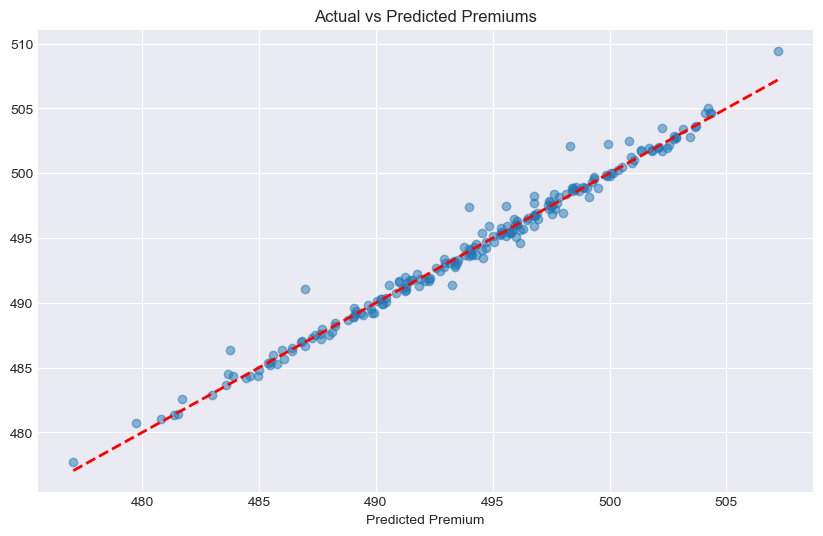

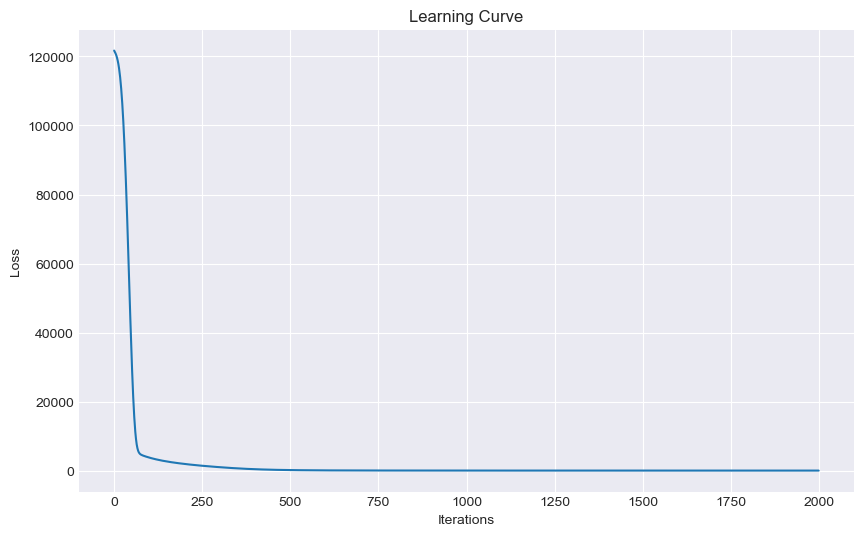

In [11]:
# Visualise

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Premium')
plt.xlabel('Predicted Premium')
plt.title('Actual vs Predicted Premiums')
plt.show()

# Learning Curve
plt.figure(figsize=(10,6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()